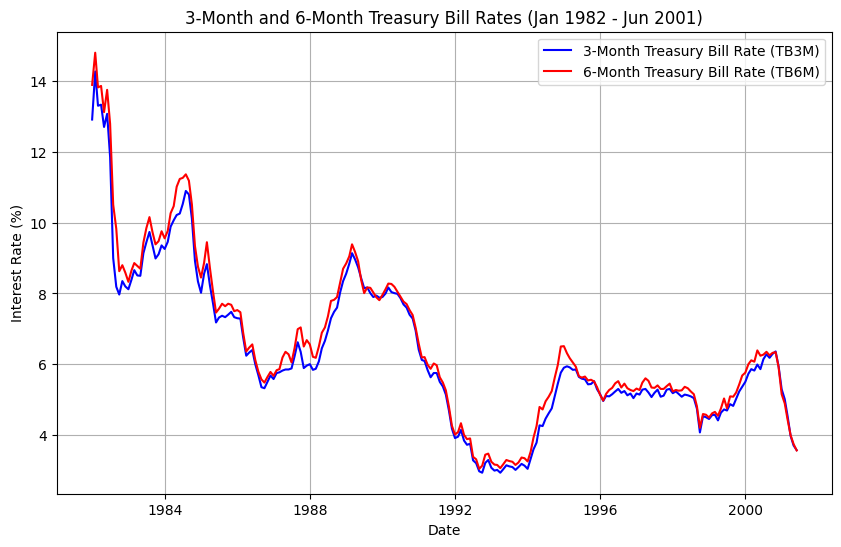


Plot Observations:
The 3-month (TB3M) and 6-month (TB6M) rates move closely together, with TB6M generally slightly higher due to the term premium. Both series start high (~12–14%) in 1982, decline to ~5–6% by 1986, stabilize at ~3–5% in the early 1990s, and rise to ~5–6% by 2000–2001. Their similar trends suggest a potential long-run relationship.

ADF Test for TB3M:
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values: {'1%': np.float64(-3.460018927623594), '5%': np.float64(-2.8745897386146817), '10%': np.float64(-2.57372514086348)}
Conclusion: TB3M is non-stationary (fail to reject null hypothesis of unit root).

ADF Test for TB6M:
ADF Statistic: -3.7738
p-value: 0.0032
Critical Values: {'1%': np.float64(-3.458854867412691), '5%': np.float64(-2.8740800599399323), '10%': np.float64(-2.573453223097503)}
Conclusion: TB6M is stationary (reject null hypothesis of unit root).

Long-run regression (TB6M ~ TB3M):
                            OLS Regression Results                          

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [3]:
# Install required libraries in Colab
!pip install pandas matplotlib statsmodels numpy

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

# Step 1: Create the dataset from provided text
data_text = """
obs	GS3M		GS6M
1982:01	 12.92000	 13.90000
1982:02	 14.28000	 14.81000
1982:03	 13.31000	 13.83000
1982:04	 13.34000	 13.87000
1982:05	 12.71000	 13.13000
1982:06	 13.08000	 13.76000
1982:07	 11.86000	 12.80000
1982:08	 9.000000	 10.51000
1982:09	 8.190000	 9.830000
1982:10	 7.970000	 8.630000
1982:11	 8.350000	 8.800000
1982:12	 8.200000	 8.590000
1983:01	 8.120000	 8.330000
1983:02	 8.390000	 8.650000
1983:03	 8.660000	 8.860000
1983:04	 8.510000	 8.780000
1983:05	 8.500000	 8.700000
1983:06	 9.140000	 9.440000
1983:07	 9.450000	 9.850000
1983:08	 9.740000	 10.16000
1983:09	 9.360000	 9.730000
1983:10	 8.990000	 9.390000
1983:11	 9.110000	 9.480000
1983:12	 9.360000	 9.760000
1984:01	 9.260000	 9.560000
1984:02	 9.460000	 9.770000
1984:03	 9.890000	 10.27000
1984:04	 10.07000	 10.47000
1984:05	 10.22000	 11.02000
1984:06	 10.26000	 11.24000
1984:07	 10.53000	 11.27000
1984:08	 10.90000	 11.37000
1984:09	 10.80000	 11.19000
1984:10	 10.12000	 10.52000
1984:11	 8.920000	 9.340000
1984:12	 8.340000	 8.760000
1985:01	 8.020000	 8.450000
1985:02	 8.560000	 8.870000
1985:03	 8.830000	 9.450000
1985:04	 8.220000	 8.710000
1985:05	 7.730000	 8.070000
1985:06	 7.180000	 7.460000
1985:07	 7.320000	 7.570000
1985:08	 7.370000	 7.710000
1985:09	 7.330000	 7.640000
1985:10	 7.400000	 7.710000
1985:11	 7.480000	 7.680000
1985:12	 7.330000	 7.500000
1986:01	 7.300000	 7.530000
1986:02	 7.290000	 7.470000
1986:03	 6.760000	 6.890000
1986:04	 6.240000	 6.360000
1986:05	 6.330000	 6.470000
1986:06	 6.400000	 6.560000
1986:07	 6.000000	 6.120000
1986:08	 5.690000	 5.790000
1986:09	 5.350000	 5.570000
1986:10	 5.320000	 5.480000
1986:11	 5.500000	 5.640000
1986:12	 5.680000	 5.780000
1987:01	 5.580000	 5.670000
1987:02	 5.750000	 5.830000
1987:03	 5.770000	 5.860000
1987:04	 5.820000	 6.190000
1987:05	 5.850000	 6.350000
1987:06	 5.850000	 6.280000
1987:07	 5.880000	 6.050000
1987:08	 6.230000	 6.460000
1987:09	 6.620000	 6.990000
1987:10	 6.350000	 7.040000
1987:11	 5.890000	 6.500000
1987:12	 5.960000	 6.680000
1988:01	 6.000000	 6.560000
1988:02	 5.840000	 6.210000
1988:03	 5.870000	 6.180000
1988:04	 6.080000	 6.500000
1988:05	 6.450000	 6.890000
1988:06	 6.660000	 7.040000
1988:07	 6.950000	 7.350000
1988:08	 7.300000	 7.790000
1988:09	 7.480000	 7.820000
1988:10	 7.600000	 7.900000
1988:11	 8.030000	 8.300000
1988:12	 8.350000	 8.700000
1989:01	 8.560000	 8.850000
1989:02	 8.840000	 9.050000
1989:03	 9.140000	 9.390000
1989:04	 8.960000	 9.170000
1989:05	 8.740000	 8.910000
1989:06	 8.430000	 8.380000
1989:07	 8.150000	 8.010000
1989:08	 8.170000	 8.170000
1989:09	 8.010000	 8.160000
1989:10	 7.900000	 8.030000
1989:11	 7.940000	 7.890000
1989:12	 7.880000	 7.810000
1990:01	 7.900000	 7.960000
1990:02	 8.000000	 8.120000
1990:03	 8.170000	 8.280000
1990:04	 8.040000	 8.270000
1990:05	 8.010000	 8.190000
1990:06	 7.990000	 8.050000
1990:07	 7.870000	 7.920000
1990:08	 7.690000	 7.770000
1990:09	 7.600000	 7.700000
1990:10	 7.400000	 7.530000
1990:11	 7.290000	 7.390000
1990:12	 6.950000	 7.030000
1991:01	 6.410000	 6.580000
1991:02	 6.120000	 6.190000
1991:03	 6.090000	 6.200000
1991:04	 5.830000	 5.980000
1991:05	 5.630000	 5.870000
1991:06	 5.750000	 6.020000
1991:07	 5.750000	 5.970000
1991:08	 5.500000	 5.630000
1991:09	 5.370000	 5.480000
1991:10	 5.140000	 5.260000
1991:11	 4.690000	 4.800000
1991:12	 4.180000	 4.260000
1992:01	 3.910000	 4.010000
1992:02	 3.950000	 4.080000
1992:03	 4.140000	 4.330000
1992:04	 3.840000	 4.000000
1992:05	 3.720000	 3.880000
1992:06	 3.750000	 3.900000
1992:07	 3.280000	 3.380000
1992:08	 3.200000	 3.310000
1992:09	 2.970000	 3.040000
1992:10	 2.930000	 3.130000
1992:11	 3.210000	 3.440000
1992:12	 3.290000	 3.470000
1993:01	 3.070000	 3.240000
1993:02	 2.990000	 3.160000
1993:03	 3.010000	 3.150000
1993:04	 2.930000	 3.060000
1993:05	 3.030000	 3.170000
1993:06	 3.140000	 3.290000
1993:07	 3.110000	 3.260000
1993:08	 3.090000	 3.240000
1993:09	 3.010000	 3.150000
1993:10	 3.090000	 3.220000
1993:11	 3.180000	 3.360000
1993:12	 3.130000	 3.340000
1994:01	 3.040000	 3.250000
1994:02	 3.330000	 3.530000
1994:03	 3.590000	 3.920000
1994:04	 3.780000	 4.250000
1994:05	 4.270000	 4.790000
1994:06	 4.250000	 4.720000
1994:07	 4.460000	 4.950000
1994:08	 4.610000	 5.080000
1994:09	 4.750000	 5.240000
1994:10	 5.100000	 5.620000
1994:11	 5.450000	 5.980000
1994:12	 5.760000	 6.500000
1995:01	 5.900000	 6.510000
1995:02	 5.940000	 6.310000
1995:03	 5.910000	 6.170000
1995:04	 5.840000	 6.050000
1995:05	 5.850000	 5.930000
1995:06	 5.640000	 5.660000
1995:07	 5.590000	 5.620000
1995:08	 5.570000	 5.650000
1995:09	 5.430000	 5.540000
1995:10	 5.440000	 5.560000
1995:11	 5.520000	 5.510000
1995:12	 5.290000	 5.350000
1996:01	 5.150000	 5.130000
1996:02	 4.960000	 4.970000
1996:03	 5.100000	 5.160000
1996:04	 5.090000	 5.270000
1996:05	 5.150000	 5.330000
1996:06	 5.230000	 5.460000
1996:07	 5.300000	 5.520000
1996:08	 5.190000	 5.340000
1996:09	 5.240000	 5.450000
1996:10	 5.120000	 5.320000
1996:11	 5.170000	 5.270000
1996:12	 5.040000	 5.240000
1997:01	 5.170000	 5.310000
1997:02	 5.140000	 5.270000
1997:03	 5.280000	 5.480000
1997:04	 5.300000	 5.600000
1997:05	 5.200000	 5.530000
1997:06	 5.070000	 5.340000
1997:07	 5.190000	 5.330000
1997:08	 5.280000	 5.400000
1997:09	 5.080000	 5.300000
1997:10	 5.110000	 5.300000
1997:11	 5.280000	 5.380000
1997:12	 5.300000	 5.450000
1998:01	 5.180000	 5.230000
1998:02	 5.230000	 5.270000
1998:03	 5.160000	 5.250000
1998:04	 5.080000	 5.260000
1998:05	 5.140000	 5.360000
1998:06	 5.120000	 5.320000
1998:07	 5.090000	 5.230000
1998:08	 5.040000	 5.150000
1998:09	 4.740000	 4.810000
1998:10	 4.070000	 4.200000
1998:11	 4.530000	 4.590000
1998:12	 4.500000	 4.570000
1999:01	 4.450000	 4.490000
1999:02	 4.560000	 4.610000
1999:03	 4.570000	 4.650000
1999:04	 4.410000	 4.540000
1999:05	 4.630000	 4.750000
1999:06	 4.720000	 5.030000
1999:07	 4.690000	 4.750000
1999:08	 4.870000	 5.090000
1999:09	 4.820000	 5.080000
1999:10	 5.020000	 5.200000
1999:11	 5.230000	 5.430000
1999:12	 5.360000	 5.680000
2000:01	 5.500000	 5.760000
2000:02	 5.730000	 6.000000
2000:03	 5.860000	 6.110000
2000:04	 5.820000	 6.070000
2000:05	 5.990000	 6.390000
2000:06	 5.860000	 6.240000
2000:07	 6.140000	 6.270000
2000:08	 6.280000	 6.350000
2000:09	 6.180000	 6.250000
2000:10	 6.290000	 6.320000
2000:11	 6.360000	 6.340000
2000:12	 5.940000	 5.920000
2001:01	 5.290000	 5.150000
2001:02	 5.010000	 4.890000
2001:03	 4.540000	 4.440000
2001:04	 3.970000	 3.990000
2001:05	 3.700000	 3.740000
2001:06	 3.570000	 3.560000
"""

# Parse the data
lines = data_text.strip().split('\n')
data = []
for line in lines[1:]:  # Skip header
    cols = line.split()
    if len(cols) >= 3:  # Ensure valid line
        date = cols[0].replace(':', '-')  # Convert YYYY:MM to YYYY-MM
        tb3m = float(cols[1])
        tb6m = float(cols[2])
        data.append([date, tb3m, tb6m])

# Create DataFrame and save to CSV
df = pd.DataFrame(data, columns=['Date', 'TB3M', 'TB6M'])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df.to_csv('tbill_data.csv', index=False)

# Load data for analysis
data = pd.read_csv('tbill_data.csv', parse_dates=['Date'], index_col='Date')

# 1. Plot both time series
plt.figure(figsize=(10, 6))
plt.plot(data['TB3M'], label='3-Month Treasury Bill Rate (TB3M)', color='blue')
plt.plot(data['TB6M'], label='6-Month Treasury Bill Rate (TB6M)', color='red')
plt.title('3-Month and 6-Month Treasury Bill Rates (Jan 1982 - Jun 2001)')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

print("\nPlot Observations:")
print("The 3-month (TB3M) and 6-month (TB6M) rates move closely together, with TB6M generally slightly higher due to the term premium. Both series start high (~12–14%) in 1982, decline to ~5–6% by 1986, stabilize at ~3–5% in the early 1990s, and rise to ~5–6% by 2000–2001. Their similar trends suggest a potential long-run relationship.")

# 2. ADF Unit Root Test
def adf_test(series, name):
    result = adfuller(series, autolag='AIC')
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print(f'Conclusion: {name} is stationary (reject null hypothesis of unit root).')
    else:
        print(f'Conclusion: {name} is non-stationary (fail to reject null hypothesis of unit root).')

adf_test(data['TB3M'], 'TB3M')
adf_test(data['TB6M'], 'TB6M')

# 3. Engle-Granger Cointegration Test
# Step 1: Long-run regression (TB6M ~ TB3M)
X = sm.add_constant(data['TB3M'])
model = sm.OLS(data['TB6M'], X).fit()
print('\nLong-run regression (TB6M ~ TB3M):')
print(model.summary())

# Step 2: Save residuals and test for stationarity
residuals = model.resid
adf_test(residuals, 'Residuals')

# Cointegration conclusion
print('\nCointegration Test Conclusion:')
if adfuller(residuals, autolag='AIC')[1] < 0.05:
    print('The residuals are stationary (p-value < 0.05). TB3M and TB6M are cointegrated.')
else:
    print('The residuals are non-stationary (p-value >= 0.05). TB3M and TB6M are not cointegrated.')

# 4. Economic Interpretation
print('\nEconomic Interpretation of Cointegration:')
print('If cointegrated, TB3M and TB6M share a stable long-run relationship, driven by common factors like monetary policy and inflation expectations. The 6-month rate is typically higher due to a term premium, but deviations (e.g., spread widening) are temporary and mean-reverting. If not cointegrated, the rates may drift apart, possibly due to differing market expectations or liquidity effects, indicating no stable long-run link.')

# 5. VAR Model Decision
print('\nVAR Model Decision:')
if adfuller(residuals, autolag='AIC')[1] < 0.05:
    print('Since TB3M and TB6M are cointegrated, estimate a VAR(4) model in levels to capture the long-run relationship and short-run dynamics.')
    var_model = VAR(data[['TB3M', 'TB6M']]).fit(maxlags=4)
    print('\nVAR(4) Model Summary (in levels):')
    print(var_model.summary())
else:
    print('Since TB3M and TB6M are not cointegrated, estimate a VAR(4) model in first differences to ensure stationarity and avoid spurious regression.')
    data_diff = data[['TB3M', 'TB6M']].diff().dropna()
    var_model = VAR(data_diff).fit(maxlags=4)
    print('\nVAR(4) Model Summary (in first differences):')
    print(var_model.summary())

print('\nJustification:')
print('If non-stationary and cointegrated, a VAR in levels preserves the long-run equilibrium (potentially as a VECM). If non-stationary and not cointegrated, first differences ensure stationarity, avoiding spurious results. If stationary, levels are used. Given the likely non-stationarity and possible cointegration (from plot trends), the choice depends on the cointegration test.')

print('\nNote: The dataset covers 234 observations (Jan 1982–Jun 2001), not 315 (up to Mar 2008).')